# COURSE: A deep understanding of deep learning
## SECTION: FFNs
### LECTURE: Distributions of weights pre- and post-learning
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202208

In [1]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [2]:
# import dataset (comes with colab!)
data = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'),delimiter=',')

# extract labels (number IDs) and remove from data
labels = data[:,0]
data   = data[:,1:]

# normalize the data to a range of [0 1]
dataNorm = data / np.max(data)

# Create train/test groups using DataLoader

In [3]:
# Step 1: convert to tensor
dataT   = torch.tensor( dataNorm ).float()
labelsT = torch.tensor( labels ).long()

# Step 2: use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(dataT, labelsT, test_size=.1)


# Step 3: convert into PyTorch Datasets
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)

# Step 4: translate into dataloader objects
batchsize    = 32
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

# Create the DL model

In [4]:
# create a class for the model
def createTheMNISTNet():

  class mnistNet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(784,64)
      
      ### hidden layer
      self.fc1 = nn.Linear(64,32)
      self.fc2 = nn.Linear(32,32)

      ### output layer
      self.output = nn.Linear(32,10)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      x = F.relu( self.fc2(x) )
      return self.output(x)
  
  # create the model instance
  net = mnistNet()
  
  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(net.parameters(),lr=.01)

  return net,lossfun,optimizer

In [5]:
### exploring the "innards" of the model

# create a temp model to explore
net = createTheMNISTNet()[0]

# summary of the entire model
print('Summary of model:')
print(net)
print(' ')

# # explore one of the layers
# print('Summary of input layer:')
# print( vars(net.input) )
# print(' ')

# # check out the matrix of weights
# print('Input layer weights:')
# print( net.input.weight.shape )
# print( net.input.weight )
# print(' ')

# # finally, extract the weights and make a histogram
# w = net.input.weight.detach().flatten()
# plt.hist(w,40)
# plt.xlabel('Weight value')
# plt.ylabel('Count')
# plt.title('Distribution of initialized input-layer weights')
# plt.show()

Summary of model:
mnistNet(
  (input): Linear(in_features=784, out_features=64, bias=True)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=10, bias=True)
)
 


In [15]:
# for layer in net.parameters():
#     print(layer)
#     print(type(layer))
#     print('---')

In [30]:
for layer in net.parameters():
    print(layer.detach().flatten())
    print('---')

tensor([ 0.0331,  0.0285, -0.0047,  ..., -0.0347, -0.0328, -0.0343])
---
tensor([ 0.0788,  0.0783, -0.0426, -0.0943,  0.0516,  0.0967,  0.0079,  0.0050,
        -0.0201, -0.0957, -0.0391,  0.0581,  0.0817,  0.1940,  0.0539,  0.0241,
         0.0483,  0.0737,  0.0270,  0.0658,  0.0796, -0.0260, -0.0247, -0.0533,
         0.0997,  0.0327, -0.0379,  0.0312,  0.0811,  0.0275,  0.0877,  0.1045,
        -0.0201,  0.0223,  0.0428,  0.0777, -0.0197,  0.0625,  0.0759,  0.0903,
         0.1468,  0.0443,  0.0070,  0.1199,  0.1081, -0.1166,  0.0361,  0.0463,
         0.0594,  0.0223,  0.0477,  0.0234,  0.0529,  0.0744,  0.0286,  0.0487,
         0.0478,  0.0857,  0.0669, -0.0948, -0.0022,  0.0169,  0.1414, -0.0784])
---
tensor([ 0.3507, -0.2863, -0.2492,  ...,  0.1329, -0.0382, -0.1134])
---
tensor([-0.0745,  0.1428, -0.0073,  0.0855, -0.1077, -0.0719, -0.0148, -0.0425,
        -0.0527, -0.1079,  0.1517, -0.0769,  0.0145,  0.0170,  0.1401,  0.0508,
        -0.1030,  0.0958,  0.1623,  0.0408,  0.20

In [26]:
net.fc1.weight.detach().flatten().numpy()
# seems each layer in the for-loop extracts the equivalent of "net.layer.weight"

array([ 0.35069838, -0.28633937, -0.24919125, ...,  0.13291052,
       -0.0381835 , -0.1133738 ], dtype=float32)

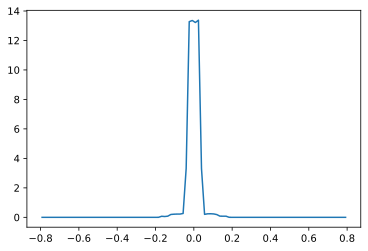

In [6]:
# a function that returns a histogram of all weights (across all layers)

def weightsHistogram(net):

  # initialize weight vector
  W = np.array([])
  
  # concatenate each set of weights
  for layer in net.parameters():
    W = np.concatenate((W,layer.detach().flatten().numpy() ))

  # compute their histogram (note: range is hard-coded)
  histy,histx = np.histogram(W,bins=np.linspace(-.8,.8,101),density=True)
  histx = (histx[1:]+histx[:-1])/2
  return histx,histy




# test it!
histx,histy = weightsHistogram(net)
plt.plot(histx,histy);

# Create a function that trains the model

In [7]:
# a function that trains the model

def funtion2trainTheModel():

  # number of epochs
  numepochs = 100
  
  # create a new model
  net,lossfun,optimizer = createTheMNISTNet()

  # initialize losses and accuracies
  losses    = torch.zeros(numepochs)
  trainAcc  = []
  testAcc   = []

  # initialize histogram variables
  histx = np.zeros((numepochs,100))
  histy = np.zeros((numepochs,100))


  # loop over epochs
  for epochi in range(numepochs):

    # get the weights distribution at the start of this epoch
    histx,histy[epochi,:] = weightsHistogram(net)
  
    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches        = torch.argmax(yHat,axis=1) == y # booleans (false/true)
      matchesNumeric = matches.float()                # convert to numbers (0/1)
      accuracyPct    = 100*torch.mean(matchesNumeric) # average and x100
      batchAcc.append( accuracyPct )                  # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = net(X)
      
    # compare the following really long line of code to the training accuracy lines
    testAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) )

  # end epochs

  # function output
  return trainAcc,testAcc,losses,net,histx,histy


# Run the model and show the results!

In [8]:
trainAcc,testAcc,losses,net,histx,histy = funtion2trainTheModel()


In [31]:
histx

array([-0.792, -0.776, -0.76 , -0.744, -0.728, -0.712, -0.696, -0.68 ,
       -0.664, -0.648, -0.632, -0.616, -0.6  , -0.584, -0.568, -0.552,
       -0.536, -0.52 , -0.504, -0.488, -0.472, -0.456, -0.44 , -0.424,
       -0.408, -0.392, -0.376, -0.36 , -0.344, -0.328, -0.312, -0.296,
       -0.28 , -0.264, -0.248, -0.232, -0.216, -0.2  , -0.184, -0.168,
       -0.152, -0.136, -0.12 , -0.104, -0.088, -0.072, -0.056, -0.04 ,
       -0.024, -0.008,  0.008,  0.024,  0.04 ,  0.056,  0.072,  0.088,
        0.104,  0.12 ,  0.136,  0.152,  0.168,  0.184,  0.2  ,  0.216,
        0.232,  0.248,  0.264,  0.28 ,  0.296,  0.312,  0.328,  0.344,
        0.36 ,  0.376,  0.392,  0.408,  0.424,  0.44 ,  0.456,  0.472,
        0.488,  0.504,  0.52 ,  0.536,  0.552,  0.568,  0.584,  0.6  ,
        0.616,  0.632,  0.648,  0.664,  0.68 ,  0.696,  0.712,  0.728,
        0.744,  0.76 ,  0.776,  0.792])

In [32]:
histy

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00116422, 0.        , 0.        , ..., 0.00232844, 0.00232844,
        0.00232844],
       [0.00116422, 0.        , 0.        , ..., 0.00349266, 0.00232844,
        0.00232844],
       [0.00116422, 0.        , 0.        , ..., 0.00349266, 0.00116422,
        0.00349266]])

In [33]:
histy.shape

(100, 100)

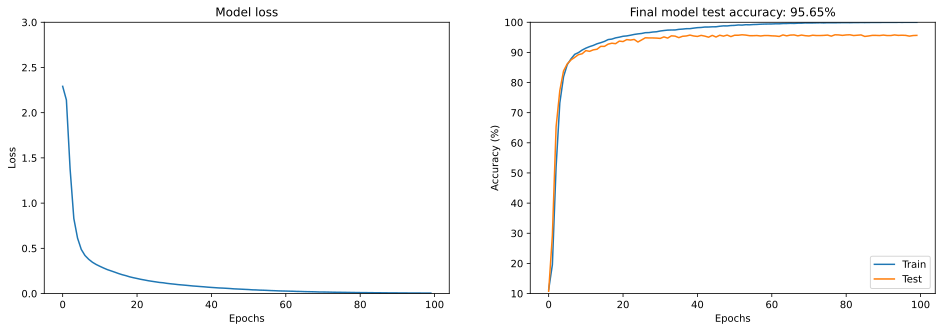

In [9]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0,3])
ax[0].set_title('Model loss')

ax[1].plot(trainAcc,label='Train')
ax[1].plot(testAcc,label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10,100])
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

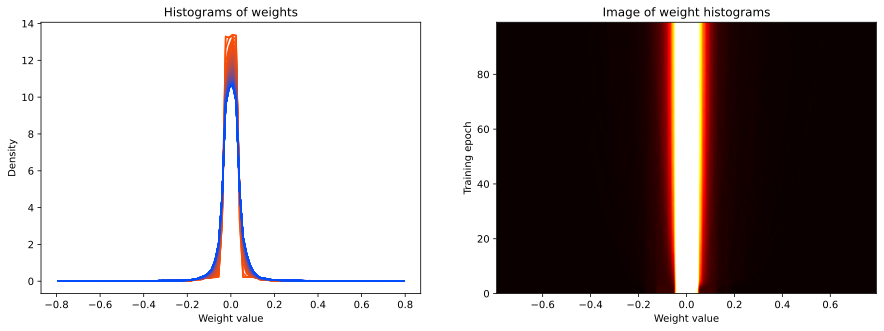

In [10]:
# show the histogram of the weights

fig,ax = plt.subplots(1,2,figsize=(15,5))

for i in range(histy.shape[0]):
  ax[0].plot(histx,histy[i,:],color=[1-i/100,.3,i/100])

ax[0].set_title('Histograms of weights')
ax[0].set_xlabel('Weight value')
ax[0].set_ylabel('Density')


ax[1].imshow(histy,vmin=0,vmax=3,
             extent=[histx[0],histx[-1],0,99],aspect='auto',origin='lower',cmap='hot')
ax[1].set_xlabel('Weight value')
ax[1].set_ylabel('Training epoch')
ax[1].set_title('Image of weight histograms')

plt.show()

# Additional explorations

In [11]:
# 1) Separate the distributions for input, hidden, and output layers. 
#    Are the learning-related changes similar across all layers?
# 
# 2) Re-run the code without data normalization. 
#    Does the scale of the data affect the scale of the weights?
# 
# 3) Test how dropout regularization affects the weight distributions.
# 